Loading data...
Plot relations...
Index(['avg_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
      avg_temperature        hdd       cdd  percipitation
773         62.500000   2.000000  0.000000       0.000000
280         61.500000   3.000000  0.000000       0.000000
629         60.000000   5.000000  0.000000       0.000000
318         63.500000   2.666667  1.333333       0.000000
1008        63.000000   2.000000  0.000000       0.000000
...               ...        ...       ...            ...
684         59.500000   5.000000  0.000000       0.000000
618         54.500000  10.000000  0.000000       0.000000
321         66.405405   0.837838  2.459459       0.033784
1007        65.000000   0.000000  0.000000       0.000000
388         68.625000   1.970588  5.838235       0.079118

[210 rows x 4 columns]
773     False
280      True
629     False
318      True
1008    False
        ...  
684     False
618     False
321      True
1007    False
388      True
Name: label, Lengt

Index(['avg_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
      avg_temperature   hdd  cdd  percipitation
1210             58.5   6.0  0.0           0.00
1729             64.0   1.0  0.0           0.01
4428             53.5  11.0  0.0           0.00
3720             57.0   8.0  0.0           0.00
2970             59.5   5.0  0.0           0.00
...               ...   ...  ...            ...
4311             52.0  13.0  0.0           0.43
73               66.5   0.0  2.0           0.00
1448             56.5   8.0  0.0           0.00
3132             60.5   4.0  0.0           1.82
43               74.0   0.0  9.0           0.00

[942 rows x 4 columns]
1210    False
1729    False
4428    False
3720    False
2970    False
        ...  
4311    False
73       True
1448    False
3132    False
43       True
Name: label, Length: 942, dtype: bool
Classify data...
[False False False False False False False False False  True False False
 False False False False False  True False F

[False False  True ... False False False]
Plot confusion matrix...


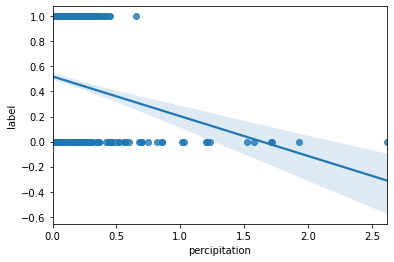

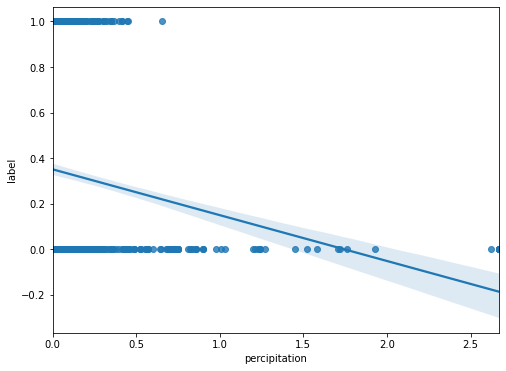

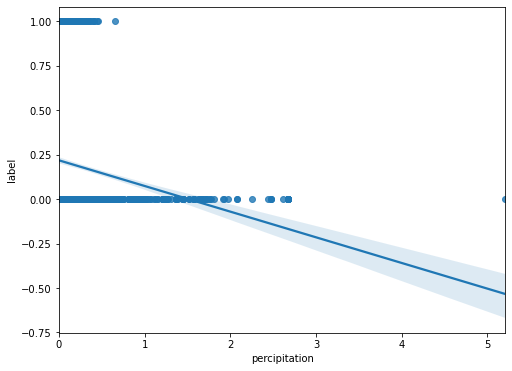

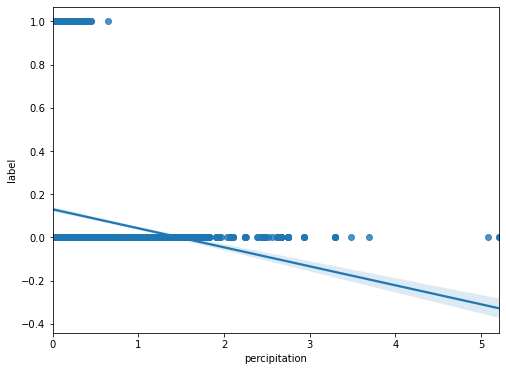

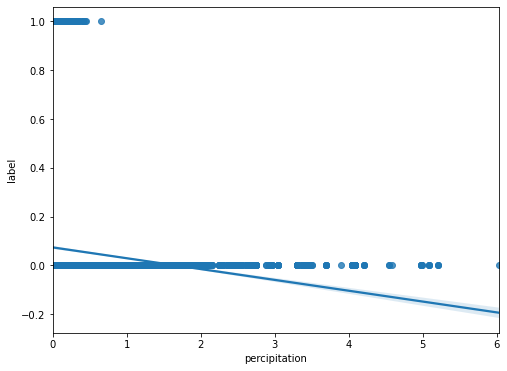

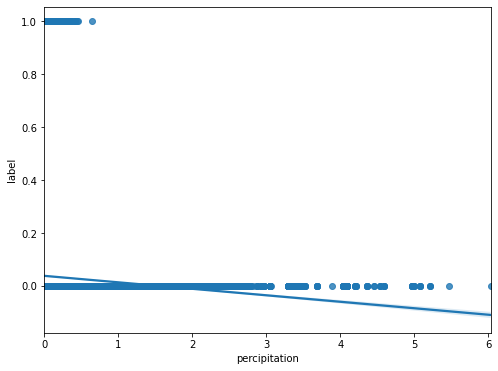

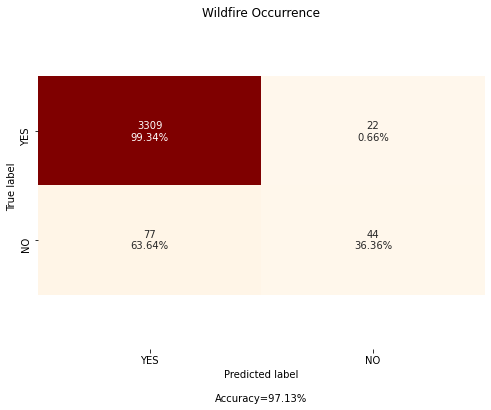

In [5]:
import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def load_model(path):
    """
    Load data from csv file
    :param path: Path for the csv file
    :return: return the data in the file
    """
    data = pd.read_csv(path)
    return data


def preprocess_input(X):
    """
    Remove uncessary column and convert date to ordinal data
    :param X: input data to preprocess
    :return: processed data
    """
    X.drop(columns=['end'], inplace=True)
    X.drop(columns=['start'], inplace=True)

    X.drop(columns=['SHAPELEN'], inplace=True)
    X.drop(columns=['SHAPEAREA'], inplace=True)
    
    X.drop(columns=['max_temperature'], inplace=True)
    X.drop(columns=['min_temperature'], inplace=True)
    #X.drop(columns=['avg_temperature'], inplace=True)
    X.drop(columns=['departure_temperature'], inplace=True)
    #X.drop(columns=['hdd'], inplace=True)
    #X.drop(columns=['cdd'], inplace=True)
    #X.drop(columns=['percipitation'], inplace=True)
    print(X.columns)

        
#     X['start'] = pd.to_datetime(X['start'])
#     X['start'] = X['start'].map(datetime.datetime.toordinal)
    X = pd.get_dummies(X)
    return X


def make_confusion_matrix(cf, categories,
                          group_names=None,
                          count=True,
                          percent=True,
                          color_bar=True,
                          xy_ticks=True,
                          xy_plot_labels=True,
                          sum_stats=True,
                          fig_size=None,
                          c_map='Blues',
                          title=None):
    """
    Code to generate text within each box and beautify confusion matrix.
    :param cf: Confusion matrix
    :param categories: array of classes
    :param group_names: classes in the project
    :param count: whether to display the count of each class
    :param percent: whether to display percentage for each class
    :param color_bar: whether to display color bar for the heat map
    :param xy_ticks: whether to display xy labels
    :param xy_plot_labels: whether to display xy title
    :param sum_stats: whether to display overall accuracy
    :param fig_size: size of the plot
    :param c_map: color scheme to use
    :param title: Title of the plot
    :return: Confusion matrix
    """
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        row_size = np.size(cf, 0)
        col_size = np.size(cf, 1)
        group_percentages = []
        for i in range(row_size):
            for j in range(col_size):
                group_percentages.append(cf[i][j] / cf[i].sum())
        group_percentages = ["{0:.2%}".format(value)
                             for value in group_percentages]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip()
                  for v1, v2, v3 in zip(group_labels,
                                        group_counts,
                                        group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))
        stats_text = "\n\nAccuracy={0:0.2%}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if fig_size is None:
        # Get default figure size if not set
        fig_size = plt.rcParams.get('figure.figsize')

    if not xy_ticks:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEAT MAP VISUALIZATION
    plt.figure(figsize=fig_size)
    sns.heatmap(cf, annot=box_labels, fmt="",
                cmap=c_map, cbar=color_bar,
                xticklabels=categories,
                yticklabels=categories)

    if xy_plot_labels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)


def io_trend(variable, output, data):
    """
    Identify positive or negative relation with the output label
    :param variable: input variable
    :param output: label
    :param data: wildfire data set
    :return: plot graph showing the relation
    """
    plt.clf()
    sns.regplot(x=variable, y=output, data=data)
    plt.savefig('../model_visualization/logistic_regression/{}_relation.png'.format(variable))


def main():
    FileNameList = [1,2,4,8,16,32]
    for fileName in FileNameList:
        #available fileName = 1,2,4,8,16,32,300
        DATA_FILE = '../data/preprocessed/'+str(fileName)+'.csv'
        print('Loading data...')
        data = load_model(DATA_FILE)
        # Plot relation between input and output variables
        print('Plot relations...')
        io_trend('max_temperature', 'label', data)
        io_trend('percipitation', 'label', data)
        # input data
        X = data.iloc[:, 6:-1]
        X = preprocess_input(X)
        # output data
        y = data.iloc[:, -1]
        # Split train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print(X_test)
        print(y_test)
        # Logistic regression classifier
        print('Classify data...')

        clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='linear')).fit(X_train, y_train)
        prediction = clf.predict(X_test)
        print(prediction)
        print('Plot confusion matrix...')
        corr = confusion_matrix(y_test, prediction)
        # plot confusion matrix
        make_confusion_matrix(corr,
                              categories=['YES', 'NO'],
                              count=True,
                              percent=True,
                              color_bar=False,
                              xy_ticks=True,
                              xy_plot_labels=True,
                              sum_stats=True,
                              fig_size=(8, 6),
                              c_map='OrRd',
                              title='Wildfire Occurrence')
        # error correction - cropped heat map
        b, t = plt.ylim()  # discover the values for bottom and top
        b += 0.5  # Add 0.5 to the bottom
        t -= 0.5  # Subtract 0.5 from the top
        plt.ylim(b, t)  # update the ylim(bottom, top) values
        plt.savefig('../model_visualization/svm/confusion_matrix_linear'+str(fileName)+'.png', bbox_inches='tight')


# if __name__ == '__main__':
#     main()
main()

In [ ]:
#rgb
#1 80.2
#2 85.67
#4 90.25
#8 92.46
#16 96.46
#32 97.91
#300 99.72

#Poly
#1 63.81
#2 77.39
#4 83.75
#8 89.38
#16 94.49
#32 96.99
#300 

Loading data...
Plot relations...
Index(['avg_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
        avg_temperature   hdd  cdd  percipitation
94966              44.0  21.0  0.0           0.00
42234              37.5  27.0  0.0           0.00
103783             46.5  18.0  0.0           0.21
21189              55.0  10.0  0.0           0.73
11942              62.5   2.0  0.0           0.04
...                 ...   ...  ...            ...
99309              41.5  23.0  0.0           0.09
108211             36.0  29.0  0.0           0.00
49142              43.0  22.0  0.0           0.11
20297              52.5  12.0  0.0           0.00
79271              38.5  26.0  0.0           0.42

[31485 rows x 4 columns]
94966     False
42234     False
103783    False
21189     False
11942     False
          ...  
99309     False
108211    False
49142     False
20297     False
79271     False
Name: label, Length: 31485, dtype: bool
Classify data...
[False False False ... False Fals

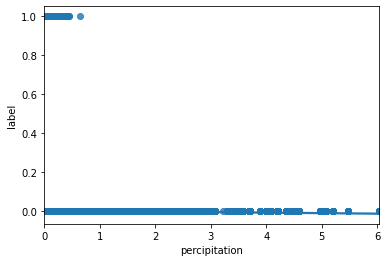

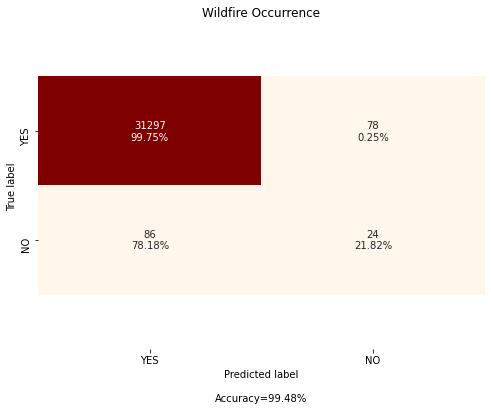

In [4]:
def svmSigMoidKernel():
    FileNameList = [300]
    for fileName in FileNameList:
        #available fileName = 1,2,4,8,16,32,300
        DATA_FILE = '../data/preprocessed/'+str(fileName)+'.csv'
        print('Loading data...')
        data = load_model(DATA_FILE)
        # Plot relation between input and output variables
        print('Plot relations...')
        io_trend('max_temperature', 'label', data)
        io_trend('percipitation', 'label', data)
        # input data
        X = data.iloc[:, 6:-1]
        X = preprocess_input(X)
        # output data
        y = data.iloc[:, -1]
        # Split train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print(X_test)
        print(y_test)
        # Logistic regression classifier
        print('Classify data...')

        clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='sigmoid')).fit(X_train, y_train)
        prediction = clf.predict(X_test)
        print(prediction)
        print('Plot confusion matrix...')
        corr = confusion_matrix(y_test, prediction)
        # plot confusion matrix
        make_confusion_matrix(corr,
                              categories=['YES', 'NO'],
                              count=True,
                              percent=True,
                              color_bar=False,
                              xy_ticks=True,
                              xy_plot_labels=True,
                              sum_stats=True,
                              fig_size=(8, 6),
                              c_map='OrRd',
                              title='Wildfire Occurrence')
        # error correction - cropped heat map
        b, t = plt.ylim()  # discover the values for bottom and top
        b += 0.5  # Add 0.5 to the bottom
        t -= 0.5  # Subtract 0.5 from the top
        plt.ylim(b, t)  # update the ylim(bottom, top) values
        plt.savefig('../model_visualization/svm/confusion_matrix_sigmoid'+str(fileName)+'.png', bbox_inches='tight')

svmSigMoidKernel()